## Compare k bin and polyfit emulators

Notebook to compare the accuracy of the polyfit and k bin emulators. This works by taking one randomly selected point out of the arxiv, and training the emulator on the rest of the arxiv. We then compare the predictions with the truth for the test point.

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import gp_emulator
import matplotlib.pyplot as plt
import numpy as np
import p1d_arxiv
import matplotlib as mpl
import os
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120

In [2]:
arxivSize=1000
kMax=8
dropRescalings=True

assert ('LYA_EMU_REPO' in os.environ),'export LYA_EMU_REPO'
repo=os.environ['LYA_EMU_REPO']

## Using the IGM only emulator
basedir=repo+'/p1d_emulator/sim_suites/emulator_512_18062019'

## Set up arxiv outside of the emulator object
archive=p1d_arxiv.ArxivP1D(basedir,max_arxiv_size=arxivSize,verbose=False,
                                drop_tau_rescalings=dropRescalings,
                                drop_temp_rescalings=dropRescalings)

## Now pop out one randomly chosen test point
test=archive.data.pop(np.random.randint(len(archive.data)))

paramList=["Delta2_p","mF","sigT_Mpc","gamma","kF_Mpc"]

In [3]:
emu_kGP=gp_emulator.GPEmulator(basedir=basedir,
                                   kmax_Mpc=kMax,train=True,
                                   paramList=paramList,
                                   emu_type="k_bin",
                                   passArxiv=archive)

emu_poly=gp_emulator.GPEmulator(basedir=basedir,
                                   kmax_Mpc=kMax,train=True,
                                   paramList=paramList,
                                   emu_type="polyfit",
                                   passArxiv=archive)

Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Training GP on 77 points
Optimised
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Training GP on 77 points
Optimised


In [4]:
## Set up model dictionary for test point
testModel = {}
parameterLimits=emu_kGP.paramLimits

for param in paramList:
    testModel[param]=test[param]

k=np.linspace(emu_kGP.arxiv.data[0]["k_Mpc"][1],emu_kGP.kmax_Mpc-0.2,100)

y,cov=emu_kGP.emulate_p1d_Mpc(testModel,k,return_covar=True)
y_poly,cov_poly=emu_poly.emulate_p1d_Mpc(testModel,k,return_covar=True)

<IPython.core.display.Javascript object>


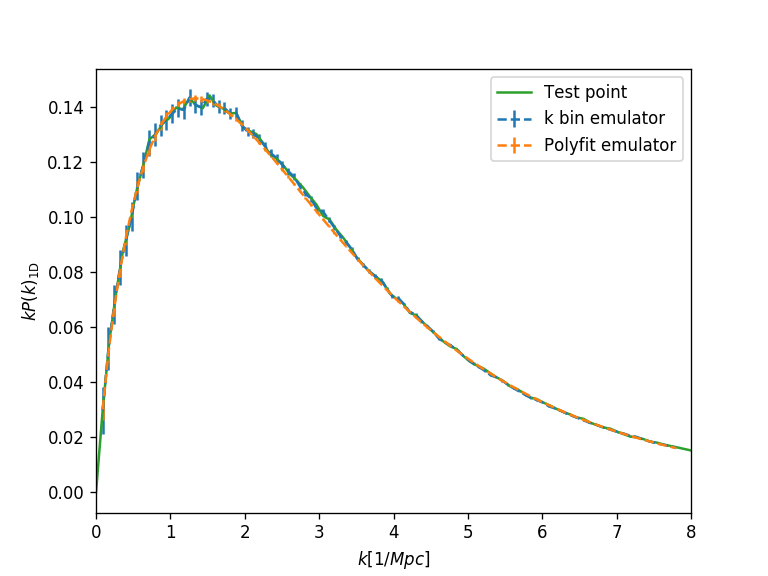

In [5]:
plt.figure()
plt.errorbar(k,y*k,yerr=np.sqrt(np.diag(cov)),linestyle="dashed",label="k bin emulator")
plt.errorbar(k,y_poly*k,yerr=np.sqrt(np.diag(cov_poly)),linestyle="dashed",label="Polyfit emulator")
plt.plot(test["k_Mpc"],test["k_Mpc"]*test["p1d_Mpc"],label="Test point")
#plt.yscale("log")
plt.ylabel(r"$kP(k)_\mathrm{1D}$")
plt.xlabel(r"$k[1/Mpc]$")
plt.xlim(0,kMax)
plt.legend()
plt.show()